# Visualizing Graphs

As previously described, graphs essentially consist of only two components, nodes and edges. Both nodes and edges may further possess additional attributes. However, these attributes usually do not include specific position or location data, except for geographical data.

This means that a graph is defined by the nodes and their connections. The exact position of the nodes, both absolutely in space and relative to each other, is not defined! That's why the following four depictions can all be considered equivalent, as the network structure (topology) is identical in all four cases.

```{figure} ../images/fig_graph_layout_intro.png
:name: fig_graph_layouts01

Graphs are based on nodes and their connections (links/edges). But in nearly all cases, this does not fully determine the position of the nodes.
```

When we need to visualize a graph, we (or an algorithm) must decide how to arrange the nodes. There are numerous possibilities for this, and the following images show six such network layouts that are included in networkx. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import networkx as nx

In [2]:
nx.layout.__all__

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'rescale_layout_dict',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout',
 'arf_layout']

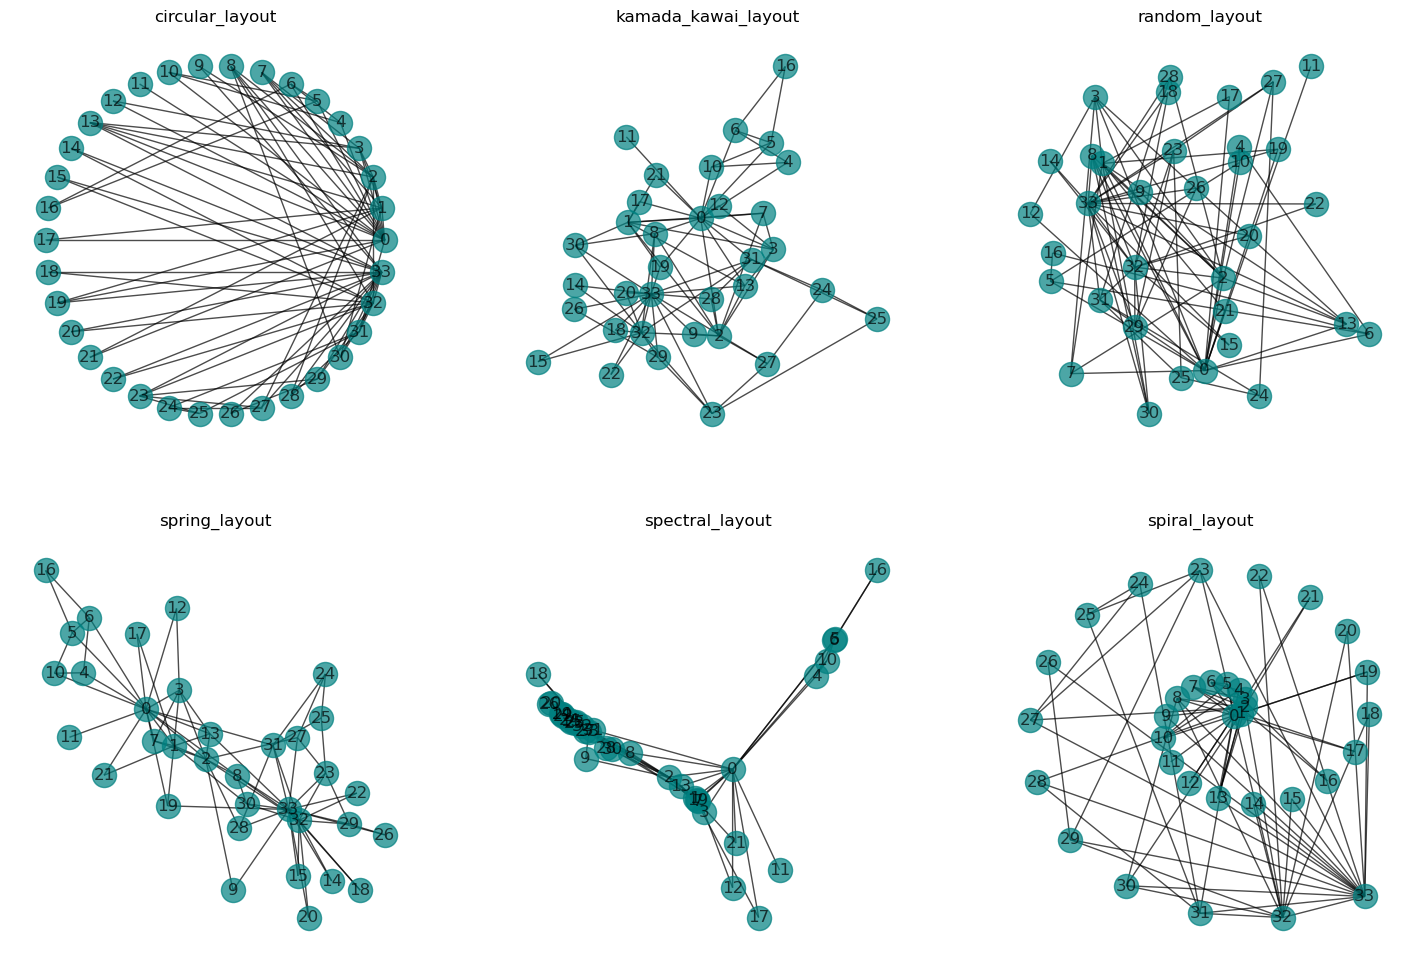

In [3]:
some_layouts = [nx.layout.circular_layout,
               nx.layout.kamada_kawai_layout,
               nx.layout.random_layout,
               nx.layout.spring_layout,
               nx.layout.spectral_layout,
               nx.layout.spiral_layout,
               ]

G = nx.karate_club_graph()
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, func in enumerate(some_layouts):
    pos = func(G)
    x = i // 3
    y = i % 3
    nx.draw(G, with_labels=True, node_color='teal',
           pos=pos, ax=axes[x, y], alpha=0.7)
    axes[x, y].set_title(func.__name__)
    
plt.show()

### Add more dimensions to the visualization
Inspecting graphs visually is often a great way to get an intuition of the data. Besides node and edge positions, we can add additional information (or attributes) through node labels, node color, but also node size and shape.

In the following, we will color each node by its degree, i.e., the number of connections each node has.

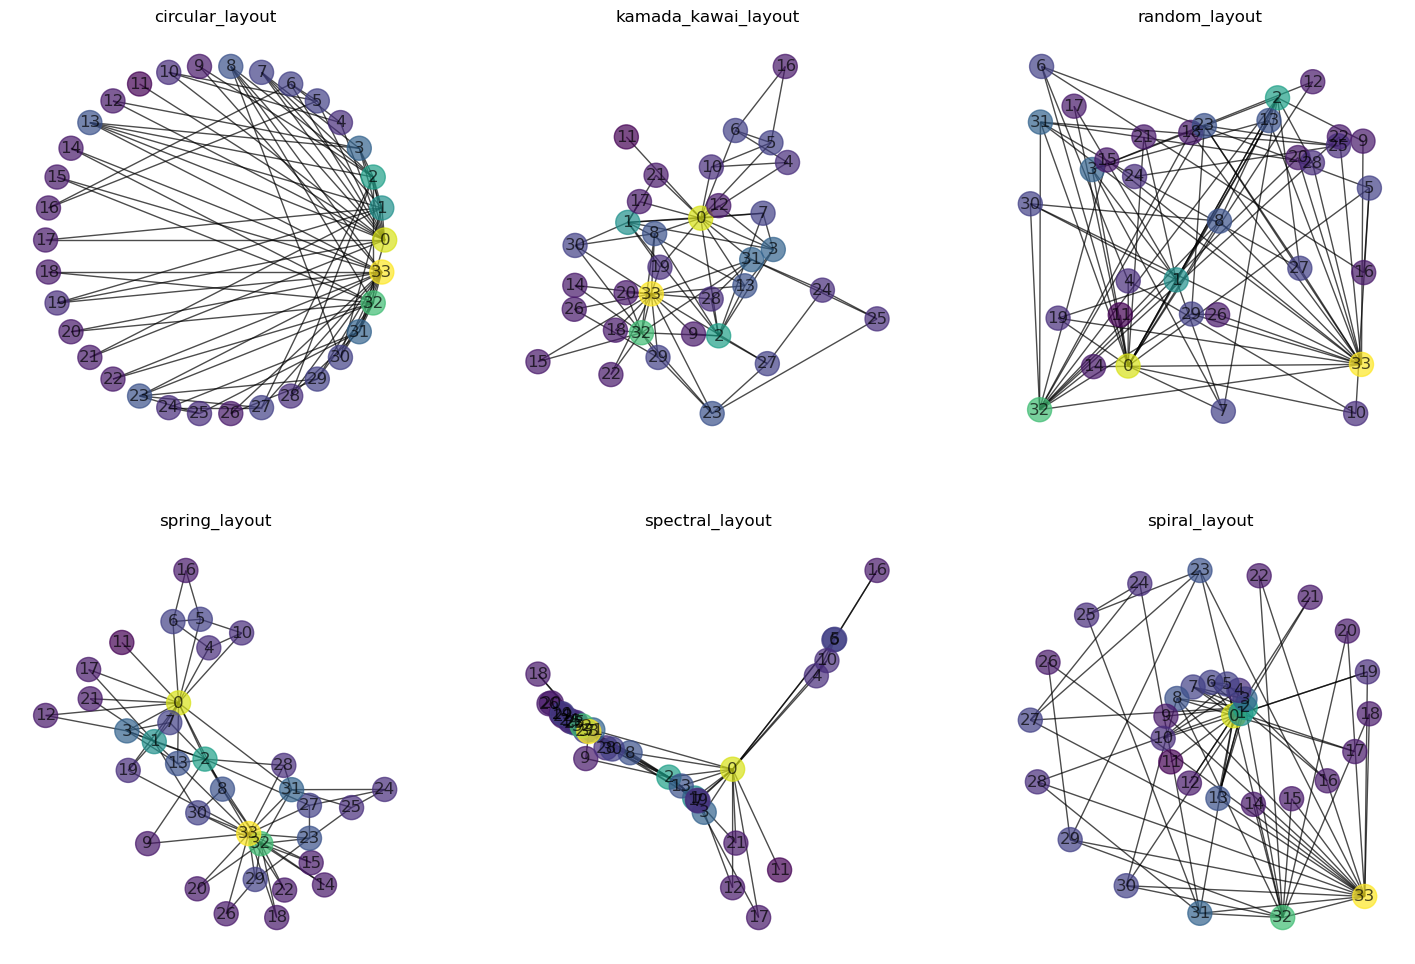

In [4]:
some_layouts = [nx.layout.circular_layout,
               nx.layout.kamada_kawai_layout,
               nx.layout.random_layout,
               nx.layout.spring_layout,
               nx.layout.spectral_layout,
               nx.layout.spiral_layout,
               ]

G = nx.karate_club_graph()
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, func in enumerate(some_layouts):
    pos = func(G)
    x = i // 3
    y = i % 3
    nx.draw(G, with_labels=True, node_color=[G.degree(n) for n in G.nodes()],
           pos=pos, ax=axes[x, y], alpha=0.7)
    axes[x, y].set_title(func.__name__)
    
#plt.savefig("networkx_graph_layouts.png", dpi=200, bbox_inches="tight")
plt.show()

Different layouts have different strengths and weaknesses. A circular arrangement (**circular layout**) can, for instance, be useful for quickly identifying which nodes have the most connections (and where these lead). Layouts such as random layout or other fixed forms like spirals etc. (as seen above: **spiral layout**) are much less commonly used in practice.

The most commonly used layout is a so-called "force-directed" layout (in networkx the **spring-layout**, but also the **kamada-kawai-layout** fall in this category).

## Force-directed / spring layout

In the so-called force-directed layout, links are interpreted as mechanical springs. In a sort of physics simulation, the nodes (connected by the mechanical springs) are then gradually moved depending on the prevailing forces (springs and attractive forces).

Depending on the tool, various parameters can be set. Central here is the "strength" and/or "length" of the springs, often expressed as the physical spring constant $k$. This can lead to very different results:

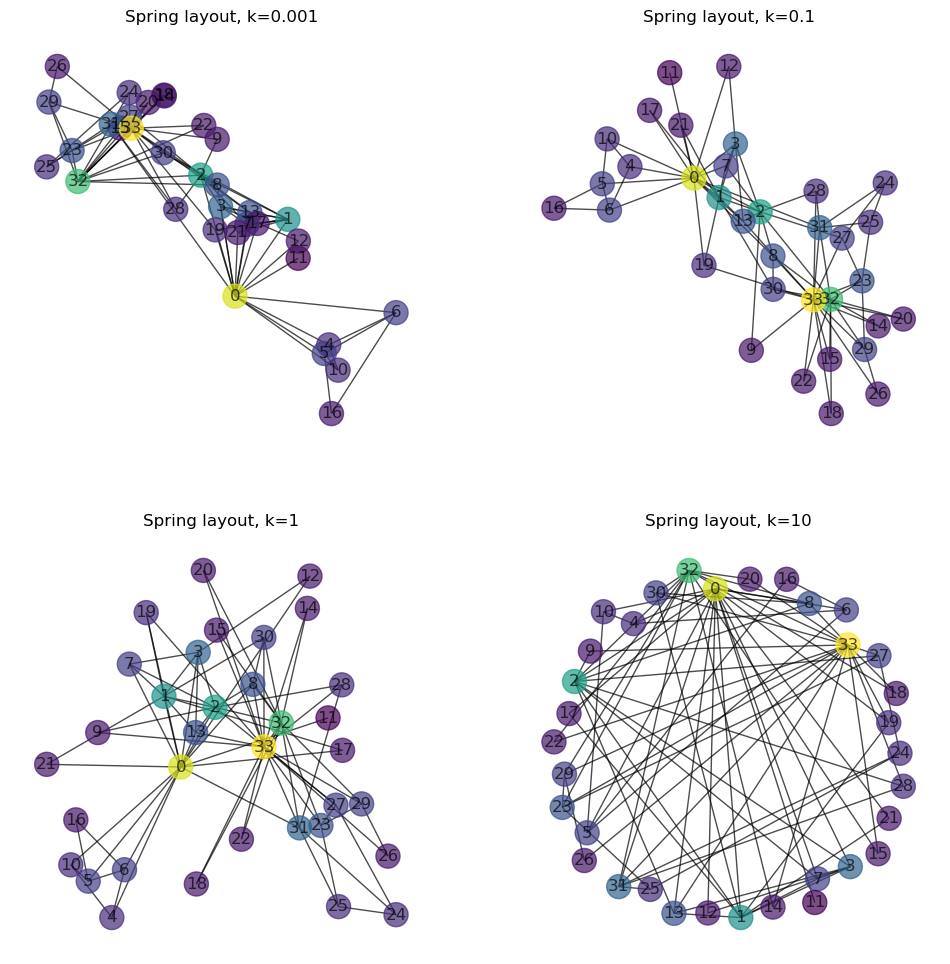

In [5]:
G = nx.karate_club_graph()
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, k in enumerate([0.001, 0.1, 1, 10]):
    pos = nx.layout.spring_layout(G, k=k)
    x = i // 2
    y = i % 2
    nx.draw(G, with_labels=True, node_color=[G.degree(n) for n in G.nodes()],
           pos=pos, ax=axes[x, y], alpha=0.7)
    axes[x, y].set_title(f"Spring layout, k={k}")

#plt.savefig("networkx_graph_spring_layouts.png", dpi=200, bbox_inches="tight")    
plt.show()

### Visual Randomness
Moreover, even with a set layout type and parameters, there are significant visual variations that result from the random starting positions of the nodes. If we apply the same layout to the same graph multiple times, the results all look different (unless the seed is fixed).

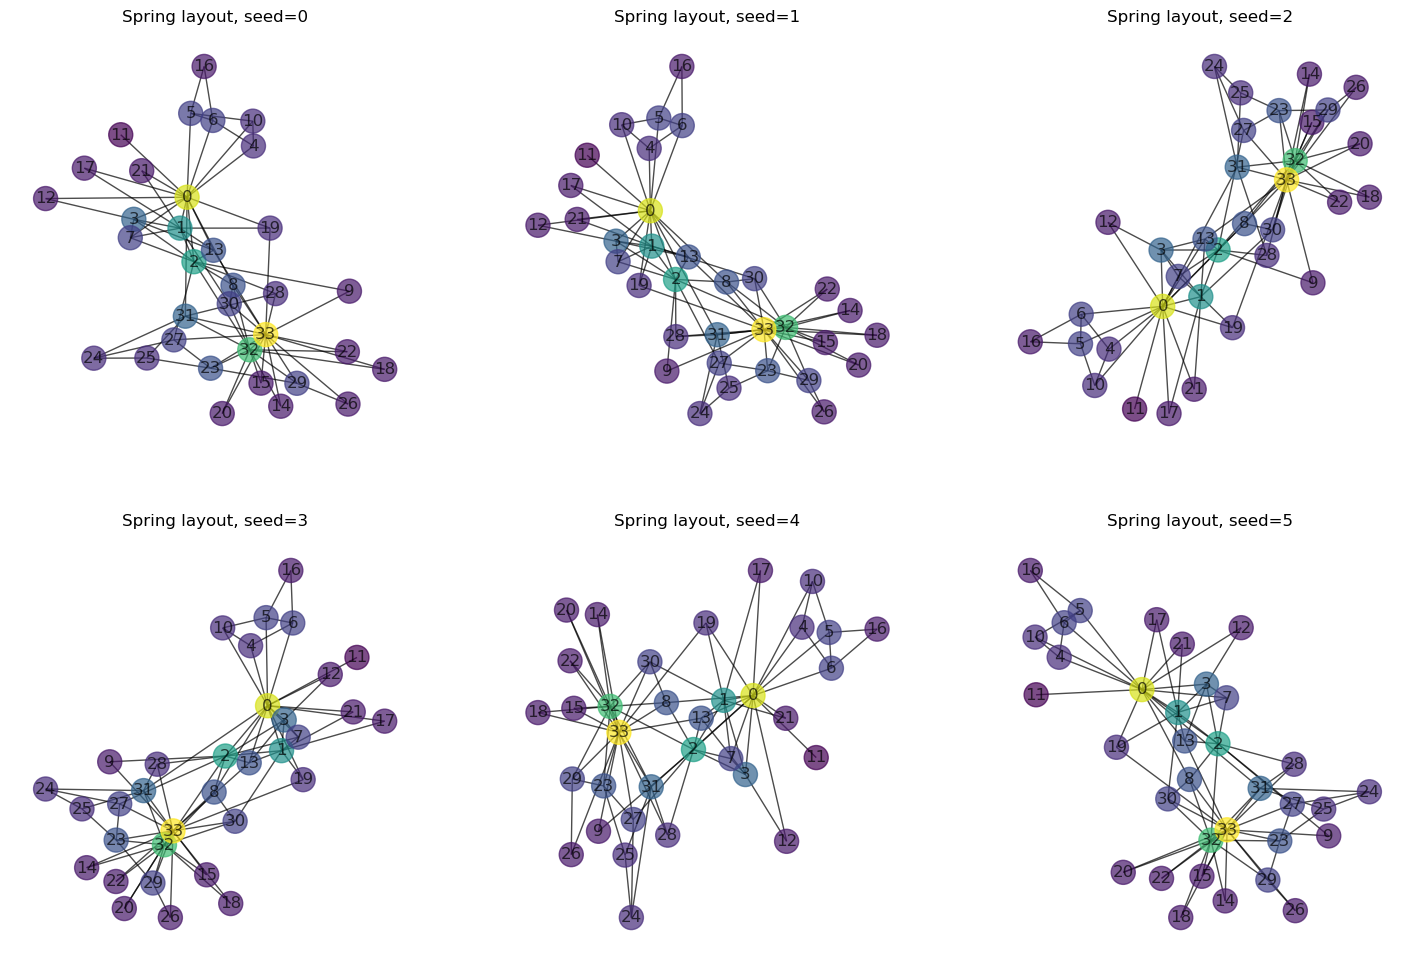

In [6]:
G = nx.karate_club_graph()
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, seed in enumerate([0, 1, 2, 3, 4, 5]):
    pos = nx.layout.spring_layout(G, seed=seed)
    x = i // 3
    y = i % 3
    nx.draw(G, with_labels=True, node_color=[G.degree(n) for n in G.nodes()],
           pos=pos, ax=axes[x, y], alpha=0.7)
    axes[x, y].set_title(f"Spring layout, seed={seed}")

#plt.savefig("networkx_graph_spring_layouts_random.png", dpi=200, bbox_inches="tight")    
plt.show()

## Interactive Plots
As just shown in the figure above, the position of nodes is usually neither static nor fixed. Exceptions are graphs that have a corresponding, physical counterpart, such as locations on a geographic map.

When working with network data, we often quickly reach a point where static visualizations (such as all the graphs plotted in this section so far) are no longer good enough.

In Python, there are a few ways to visualize the networks dynamically using special plotting libraries. One of them is [`pyvis`](https://pyvis.readthedocs.io/en/latest/index.html). Here is an example of how to plot the karate network using pyvis:

In [21]:
from pyvis.network import Network

# Create a pyvis Network object
net = Network(height = "700px", width = "700px", notebook = True, cdn_resources='remote')

node_sizes = [2 * G.degree(n) for n in G.nodes()]
            
# Set node sizes and colors
for i, name in enumerate(G.nodes):
    G.nodes[name]['size'] = node_sizes[i]
    G.nodes[name]['color'] = "lightblue" if name == 0 or name == 33 else "crimson"

# Set edge color
for i in G.edges:
    G.edges[i]['color'] = "grey"

net.from_nx(G)
net.show('out1.html')

out1.html


## Visualization Tools

While Python, along with `networkx`, can be used for graph visualization, it's typically used only for initial exploration or for very small graphs or subgraphs. For more elaborate visualizations, there are several quite useful and freely available tools:

#### Cytoscape (https://cytoscape.org/)

Cytoscape provides a wide range of settings for layout and graphical features, making it a flexible tool for graph visualization.

**Pros:**

- Many layout and graphical settings.
- Good export functionality (image, graph, HTML).
- Good data import functions.

**Cons:**

- No live rendering.
- Possibly more quickly overwhelmed than Gephi and Graphia?

#### Gephi (https://gephi.org/)

Gephi is recognized for its live rendering and ability to handle relatively large graphs. It also offers numerous statistical tools for in-depth graph analysis:

**Pros:**

- Live rendering.
- Can handle (relatively) large graphs reasonably well.
- Many statistical functions.

**Cons:**

- Graphically offers fewer options than Cytoscape.

#### Graphia (https://graphia.app/)

Graphia is a quick tool that provides a 3D option for graph visualization. However, it's not as flexible as the other tools in terms of layout and graphical settings:

**Pros:**

- Fast performance.
- 3D option available.

**Cons:**

- Fewer customization options (for both layout and graphical display).
- Image export is not very flexible.